# Deep learning methods for forecasting COVID-19 time-Series data
This paper presents a comparative study of five deep learning methods to forecast the number of new
cases and recovered cases. Specifically, simple Recurrent Neural Network (RNN), Long short-term memory (LSTM) and Gated recurrent units (GRUs) algorithms have been applied for global forecasting of COVID-19 cases. Source - https://github.com/CSSEGISandData

Importing Numpy, Pandas & Matplotlib Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading CSV
Reading Dataset CSV File and storing it in "confirmed" as a Data Frame

In [2]:
confirmed = pd.read_csv('C:\\Users\\Ankit Patel\\Desktop\\Seminar II\\confirmed.csv')

In [3]:
confirmed

,Province/State,Country/Region,Lat,Long,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,2,2,2,2,2,2,...,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,296132,296817,298032,299172,299971,300587,301203,301630,301924,302569


### Group By
Pandas groupby is used for grouping the data according to the categories and apply a function to the categories. It also helps to aggregate data efficiently. We used it to split the data into groups based on Country/Region and applied sum function.

In [4]:
confirmed = confirmed.groupby('Country/Region').sum()

In [5]:
confirmed

,Lat,Long,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,2,2,2,2,2,2,2,2,...,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585


### Drop Columns
Deleting unnecessary columns such as Latitute and Longitude.

In [6]:
confirmed = confirmed.drop(['Lat','Long'],axis=1)

In [7]:
confirmed

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,...,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252
Albania,0,0,0,0,0,0,0,0,0,0,...,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859
Algeria,0,0,0,0,0,0,0,0,0,0,...,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701
Angola,0,0,0,0,0,0,0,0,0,0,...,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2,2,2,2,2,2,2,2,2,6,...,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599
Yemen,0,0,0,0,0,0,0,0,0,0,...,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585


### Filtering Rows
Selecting only those rows(countries) which are useful to us.

In [8]:
confirmed = confirmed.loc[['India']]

In [9]:
confirmed

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,...,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,1,1,1,...,37380253,37618271,37901241,38218773,38566027,38903731,39237264,39543328,39799202,40085116


Transposing the DataFrame

In [10]:
confirmed = confirmed.transpose()

In [11]:
confirmed.columns=['Cumm. Confirmed Cases - India']

In [12]:
confirmed.index.name='Date'

In [13]:
confirmed

,Cumm. Confirmed Cases - India
Date,
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
1/27/20,0
...,...
1/21/22,38903731
1/22/22,39237264
1/23/22,39543328


Converting Date Column into DateTime Column

In [14]:
confirmed.index = pd.to_datetime(confirmed.index)

In [15]:
confirmed

,Cumm. Confirmed Cases - India
Date,
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
...,...
2022-01-21,38903731
2022-01-22,39237264
2022-01-23,39543328


In [16]:
confirmed.index.freq="D"

## Data Visualization

Ploting TimeSeries

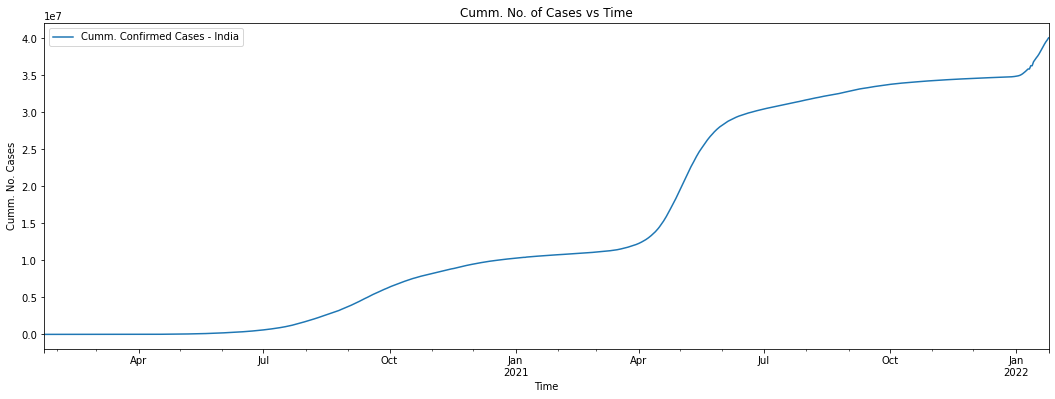

In [17]:
pt=confirmed.plot(figsize=(18,6), xlabel='Time', ylabel='Cumm. No. Cases', title='Cumm. No. of Cases vs Time')

## Forecasting with ARIMA(Autoregressive Integrated Moving Averages) Model

AutoRegressive Integrated Moving Average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 
ARIMA (Autoregressive Integrated Moving Averages) - Non-seasonal ARIMA, Seasonal ARIMA (SARIMA).


### Train/Test Split

In [18]:
train_data = confirmed.loc[:'2022-01-09']
test_data = confirmed.loc['2022-01-09':]

### ACF & PACF Plots

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

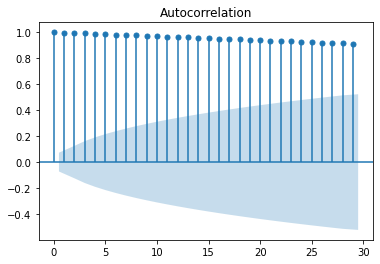

In [20]:
plot_acf(confirmed);

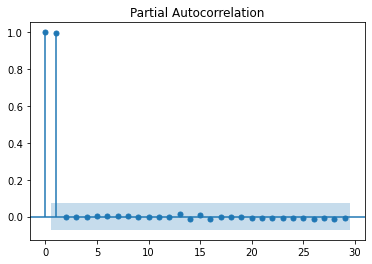

In [21]:
plot_pacf(confirmed);

### Dickey Fuller's Test for Stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [23]:
adf_test(confirmed['Cumm. Confirmed Cases - India'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.221823
p-value                   0.973459
# lags used              20.000000
# observations          713.000000
critical value (1%)      -3.439555
critical value (5%)      -2.865602
critical value (10%)     -2.568933
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [24]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Run pmdarima.auto_arima to obtain recommended orders

In [25]:
from pmdarima import auto_arima # for determining ARIMA orders
stepwise_fit = auto_arima(train_data['Cumm. Confirmed Cases - India'], 
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=14676.471, Time=2.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=14757.578, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=14730.639, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=14730.961, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=14756.447, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=14684.870, Time=2.26 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=14725.446, Time=1.53 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=14674.791, Time=1.65 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=14671.805, Time=2.32 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=14715.482, Time=0.87 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=14712.984, Time=1.52 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=14732.519, Time=0.16 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=14711.908, Time=0.45 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=14661.894, Time=2.54 sec
 ARIMA(5,2,2)(0,0,0

In [26]:
auto_arima(train_data['Cumm. Confirmed Cases - India'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  718
Model:               SARIMAX(3, 2, 3)   Log Likelihood               -7262.947
Date:                Wed, 16 Mar 2022   AIC                          14539.894
Time:                        12:15:57   BIC                          14571.910
Sample:                             0   HQIC                         14552.257
                                - 718                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5315      0.011     46.841      0.000       0.509       0.554
ar.L2         -0.5523      0.011    -48.541      0.000      -0.575      -0.530
ar.L3          0.9633      0.010     96.120      0.000       0.944       0.983
ma.L1         -0.4205      0.020    -20.653      0.000      -0.460      -0.381
ma.L2          0.5677      0.022     26.278      0.000       0.525       0.610
ma.L3         -0.7706      0.019    -40.146      0.000      -0.808      -0.733
sigma2      3.597e+07   1.61e-10   2.24e+17      0.000     3.6e+07     3.6e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.53   Jarque-Bera (JB):              2989.80
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               3.03   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+32. Standard errors may be unstable.
"""

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data['Cumm. Confirmed Cases - India'],order=(3,2,3))
results = model.fit()

In [28]:
# Obtain predicted values
start=len(train_data)-1
end=len(train_data)+len(test_data)-2
predictions_arima = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(3,2,3) Predictions')

In [29]:
predictions_arima

2022-01-09    3.570083e+07
2022-01-10    3.589853e+07
2022-01-11    3.610203e+07
2022-01-12    3.631986e+07
2022-01-13    3.654865e+07
2022-01-14    3.678727e+07
2022-01-15    3.703859e+07
2022-01-16    3.730151e+07
2022-01-17    3.757276e+07
2022-01-18    3.785401e+07
2022-01-19    3.814689e+07
2022-01-20    3.844823e+07
2022-01-21    3.875701e+07
2022-01-22    3.907608e+07
2022-01-23    3.940443e+07
2022-01-24    3.973899e+07
2022-01-25    4.008144e+07
Freq: D, Name: ARIMA(3,2,3) Predictions, dtype: float64

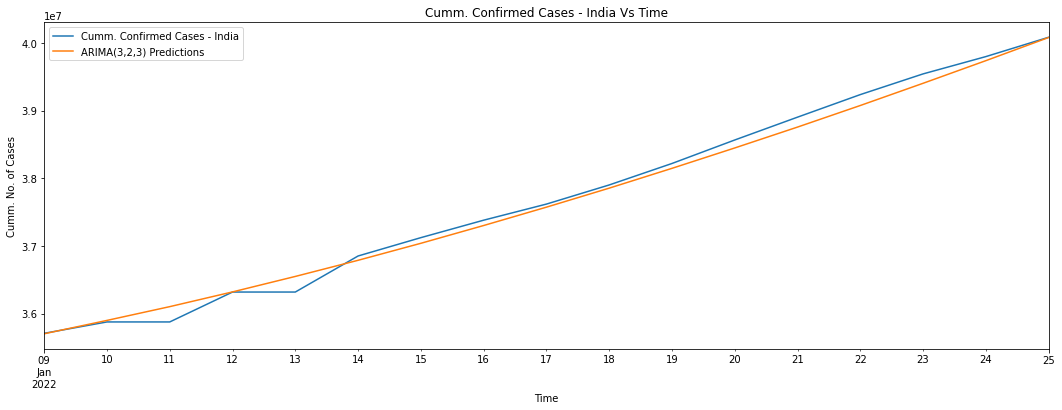

In [30]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test_data['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
predictions_arima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse
error_mae = mean_absolute_error(test_data['Cumm. Confirmed Cases - India'], predictions_arima)
error_mse = mean_squared_error(test_data['Cumm. Confirmed Cases - India'], predictions_arima)
error_rmse = rmse(test_data['Cumm. Confirmed Cases - India'], predictions_arima)

In [32]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 88685.4108369105
Mean Squared Error (MSE) : 12706497322.264324
Root Mean Squared Error (RMSE) : 112723.10021581347


In [33]:
print('Mean of Test Set: ', test_data['Cumm. Confirmed Cases - India'].mean())

Mean of Test Set:  37724793.705882356


### SARIMA(Seasonal Autoregressive Integrated Moving Averages)
Where ARIMA accepts the parameters  (𝑝,𝑑,𝑞) , SARIMA accepts an additional set of parameters  (𝑃,𝐷,𝑄)𝑚  that specifically describe the seasonal components of the model. Here  𝑃 ,  𝐷  and  𝑄  represent the seasonal regression, differencing and moving average coefficients, and  𝑚  represents the number of data points (rows) in each seasonal cycle.
NOTE: The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports exogenous regressor variables.

### Run pmdarima.auto_arima to obtain recommended orders

In [34]:
auto_arima(train_data['Cumm. Confirmed Cases - India'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  718
Model:             SARIMAX(5, 2, 1)x(0, 0, 1, 12)   Log Likelihood               -7292.836
Date:                            Wed, 16 Mar 2022   AIC                          14601.673
Time:                                    12:20:42   BIC                          14638.262
Sample:                                         0   HQIC                         14615.802
                                            - 718                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7712      0.040     19.508      0.000       0.694       0.849
ar.L2         -0.0151      0.034     -0.450      0.653      -0.081       0.051
ar.L3         -0.0008      0.041     -0.019      0.985      -0.081       0.079
ar.L4         -0.0219      0.041     -0.539      0.590      -0.102       0.058
ar.L5          0.2384      0.031      7.637      0.000       0.177       0.300
ma.L1         -0.7001      0.037    -18.912      0.000      -0.773      -0.628
ma.S.L12      -0.3695      0.032    -11.681      0.000      -0.432      -0.308
sigma2       4.87e+07   3.67e-10   1.33e+17      0.000    4.87e+07    4.87e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):              2707.30
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.1e+32. Standard errors may be unstable.
"""

### Fit a SARIMA(5,2,1)(0,0,1,12) Model

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data['Cumm. Confirmed Cases - India'],order=(5, 2, 1),seasonal_order=(0, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:      Cumm. Confirmed Cases - India   No. Observations:                  718
Model:             SARIMAX(5, 2, 1)x(0, 0, 1, 12)   Log Likelihood               -7292.836
Date:                            Wed, 16 Mar 2022   AIC                          14601.673
Time:                                    12:21:07   BIC                          14638.262
Sample:                                01-23-2020   HQIC                         14615.802
                                     - 01-09-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7712      0.040     19.508      0.000       0.694       0.849
ar.L2         -0.0151      0.034     -0.450      0.653      -0.081       0.051
ar.L3         -0.0008      0.041     -0.019      0.985      -0.081       0.079
ar.L4         -0.0219      0.041     -0.539      0.590      -0.102       0.058
ar.L5          0.2384      0.031      7.637      0.000       0.177       0.300
ma.L1         -0.7001      0.037    -18.912      0.000      -0.773      -0.628
ma.S.L12      -0.3695      0.032    -11.681      0.000      -0.432      -0.308
sigma2       4.87e+07   3.67e-10   1.33e+17      0.000    4.87e+07    4.87e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):              2707.30
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.1e+32. Standard errors may be unstable.
"""

In [36]:
# Obtain predicted values
start=len(train_data)-1
end=len(train_data)+len(test_data)-2
predictions_sarima = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(5,2,1)(0,0,1,12) Predictions')

In [37]:
predictions_sarima

2022-01-09    3.569676e+07
2022-01-10    3.590136e+07
2022-01-11    3.611028e+07
2022-01-12    3.633445e+07
2022-01-13    3.657570e+07
2022-01-14    3.683253e+07
2022-01-15    3.710471e+07
2022-01-16    3.738573e+07
2022-01-17    3.767089e+07
2022-01-18    3.796267e+07
2022-01-19    3.826139e+07
2022-01-20    3.856942e+07
2022-01-21    3.888534e+07
2022-01-22    3.921086e+07
2022-01-23    3.954509e+07
2022-01-24    3.988734e+07
2022-01-25    4.023768e+07
Freq: D, Name: SARIMA(5,2,1)(0,0,1,12) Predictions, dtype: float64

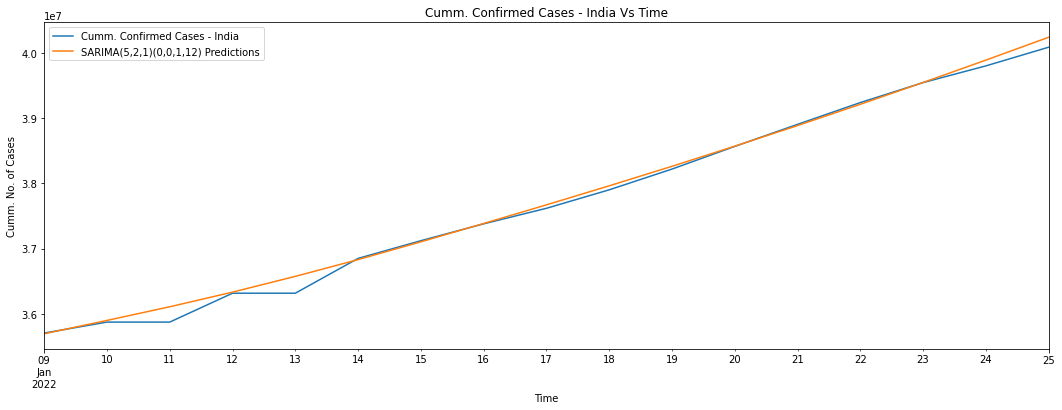

In [38]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test_data['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
predictions_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [39]:
error_mae = mean_absolute_error(test_data['Cumm. Confirmed Cases - India'], predictions_sarima)
error_mse = mean_squared_error(test_data['Cumm. Confirmed Cases - India'], predictions_sarima)
error_rmse = rmse(test_data['Cumm. Confirmed Cases - India'], predictions_sarima)

In [40]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 60824.20859317087
Mean Squared Error (MSE) : 9624024186.335567
Root Mean Squared Error (RMSE) : 98102.11101875213


In [41]:
print('Mean of Test Set: ', test_data['Cumm. Confirmed Cases - India'].mean())

Mean of Test Set:  37724793.705882356


# Holt-Winters Methods

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.


In [42]:
from statsmodels.tsa.api import ExponentialSmoothing
temp_train = train_data[train_data['Cumm. Confirmed Cases - India']>0]
temp_train = temp_train[:710]
fitted_model = ExponentialSmoothing(temp_train,trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [43]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
predictions_hw = fitted_model.forecast(17).rename('HW Predictions')

In [44]:
predictions_hw

2022-01-09    3.544449e+07
2022-01-10    3.553441e+07
2022-01-11    3.562617e+07
2022-01-12    3.572166e+07
2022-01-13    3.581536e+07
2022-01-14    3.590966e+07
2022-01-15    3.600308e+07
2022-01-16    3.610240e+07
2022-01-17    3.621073e+07
2022-01-18    3.632078e+07
2022-01-19    3.643000e+07
2022-01-20    3.643080e+07
2022-01-21    3.652117e+07
2022-01-22    3.661382e+07
2022-01-23    3.670837e+07
2022-01-24    3.680676e+07
2022-01-25    3.690330e+07
Freq: D, Name: HW Predictions, dtype: float64

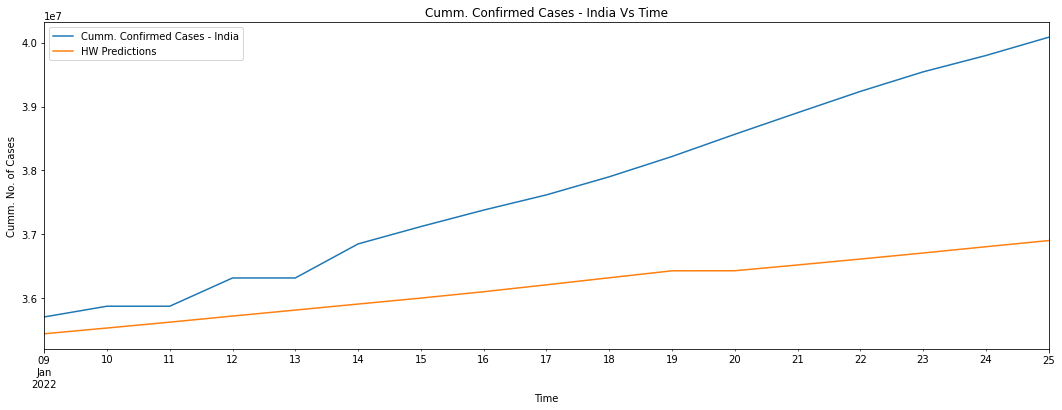

In [45]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test_data['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
predictions_hw.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [46]:
error_mae = mean_absolute_error(test_data['Cumm. Confirmed Cases - India'], predictions_hw)
error_mse = mean_squared_error(test_data['Cumm. Confirmed Cases - India'], predictions_hw)
error_rmse = rmse(test_data['Cumm. Confirmed Cases - India'], predictions_hw)

In [47]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 1542265.5277710299
Mean Squared Error (MSE) : 3325888170565.7617
Root Mean Squared Error (RMSE) : 1823701.776762243


In [48]:
print('Mean of Test Set: ', test_data['Cumm. Confirmed Cases - India'].mean())

Mean of Test Set:  37724793.705882356


## Linear Regression

In [49]:
train_data['Time']=np.arange(len(train_data.index))

In [50]:
train_data

,Cumm. Confirmed Cases - India,Time
Date,,
2020-01-23,0,0
2020-01-24,0,1
2020-01-25,0,2
2020-01-26,0,3
2020-01-27,0,4
...,...,...
2022-01-05,35109286,713
2022-01-06,35226386,714
2022-01-07,35368372,715


In [51]:
test_data['Time']=np.arange(718,718+len(test_data.index))

In [52]:
test_data

,Cumm. Confirmed Cases - India,Time
Date,,
2022-01-09,35707727,718
2022-01-10,35875790,719
2022-01-11,35875790,720
2022-01-12,36317927,721
2022-01-13,36317927,722
2022-01-14,36850962,723
2022-01-15,37122164,724
2022-01-16,37380253,725
2022-01-17,37618271,726


In [53]:
from sklearn.linear_model import LinearRegression
# Train Data
X = train_data.loc[:,['Time']]
y = train_data.loc[:,['Cumm. Confirmed Cases - India']]

#Train the Model
model = LinearRegression()
results = model.fit(X,y)

#Intercept
print('Intercept:', model.intercept_)

#Slope
print('Slope:', model.coef_)

Intercept: [-7506615.95757028]
Slope: [[62182.01211538]]


In [54]:
# Store the fitted values as a time series with the same time index as
# the training data
predictions_linearReg = results.predict(test_data.loc[:,['Time']])
predictions_linearReg_train = results.predict(train_data.loc[:,['Time']])

In [55]:
predictions_linearReg = pd.DataFrame(predictions_linearReg, index = test_data.index, columns=['Linear Regression Predictions'])
predictions_linearReg_train = pd.DataFrame(predictions_linearReg_train, index = train_data.index, columns=['Linear Regression Predictions'])

In [56]:
predictions_linearReg.head()

,Linear Regression Predictions
Date,
2022-01-09,3.714007e+07
2022-01-10,3.720225e+07
2022-01-11,3.726443e+07
2022-01-12,3.732661e+07
2022-01-13,3.738880e+07


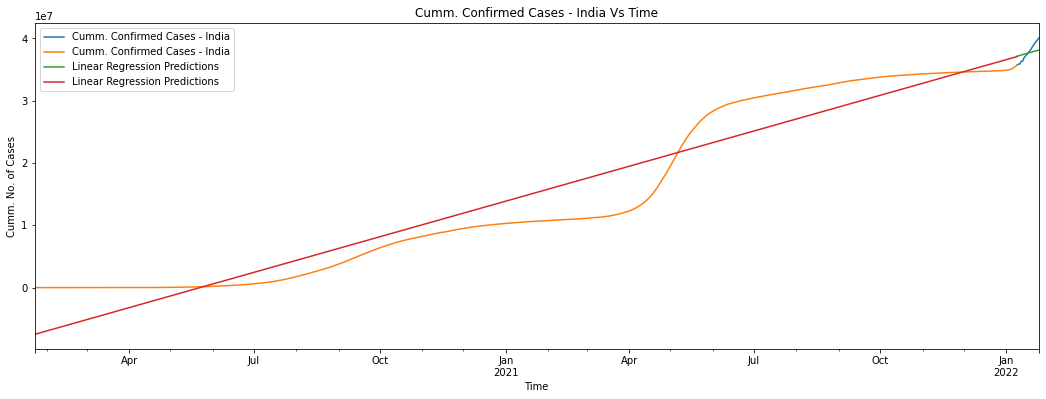

In [57]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test_data['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
ax = train_data['Cumm. Confirmed Cases - India'].plot(legend=True)
ax = predictions_linearReg['Linear Regression Predictions'].plot(legend=True)
ax = predictions_linearReg_train['Linear Regression Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

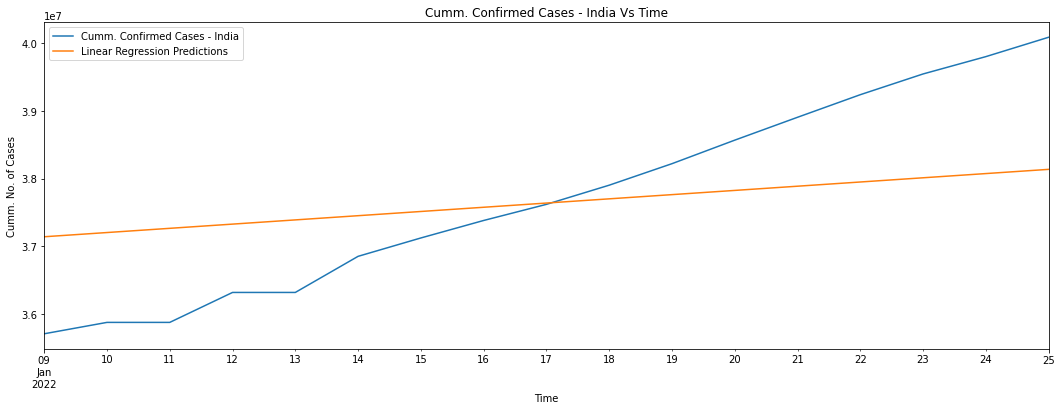

In [58]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test_data['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
ax = predictions_linearReg['Linear Regression Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [59]:
error_mae = mean_absolute_error(test_data['Cumm. Confirmed Cases - India'], predictions_linearReg['Linear Regression Predictions'])
error_mse = mean_squared_error(test_data['Cumm. Confirmed Cases - India'], predictions_linearReg['Linear Regression Predictions'])
error_rmse = rmse(test_data['Cumm. Confirmed Cases - India'], predictions_linearReg['Linear Regression Predictions'])

In [60]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 961664.1744640609
Mean Squared Error (MSE) : 1240227653375.7715
Root Mean Squared Error (RMSE) : 1113655.0872580663


In [61]:
print('Mean of Test Set: ', test_data['Cumm. Confirmed Cases - India'].mean())

Mean of Test Set:  37724793.705882356


## Facebook Prophet

In [62]:
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [63]:
df = confirmed.copy()
df = df.reset_index()
df.columns=['ds','y']
df.head()

,ds,y
0,2020-01-23,0
1,2020-01-24,0
2,2020-01-25,0
3,2020-01-26,0
4,2020-01-27,0


In [64]:
train=df.iloc[:717]
test=df.iloc[717:]

In [65]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(train)
future = model.make_future_dataframe(periods=17)
forecast = model.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
729,2022-01-21,3.556104e+07,3.531200e+07,3.580289e+07,3.537194e+07,3.568743e+07,0.000254,0.000254,0.000254,0.000254,0.000254,0.000254,0.0,0.0,0.0,3.557006e+07
730,2022-01-22,3.557922e+07,3.530508e+07,3.583752e+07,3.535298e+07,3.572924e+07,0.000390,0.000390,0.000390,0.000390,0.000390,0.000390,0.0,0.0,0.0,3.559309e+07
731,2022-01-23,3.559741e+07,3.532124e+07,3.587016e+07,3.533835e+07,3.577708e+07,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.0,0.0,0.0,3.560228e+07
732,2022-01-24,3.561559e+07,3.525424e+07,3.590341e+07,3.532441e+07,3.583625e+07,-0.000302,-0.000302,-0.000302,-0.000302,-0.000302,-0.000302,0.0,0.0,0.0,3.560483e+07
733,2022-01-25,3.563378e+07,3.527991e+07,3.595338e+07,3.529318e+07,3.589676e+07,-0.000345,-0.000345,-0.000345,-0.000345,-0.000345,-0.000345,0.0,0.0,0.0,3.562148e+07


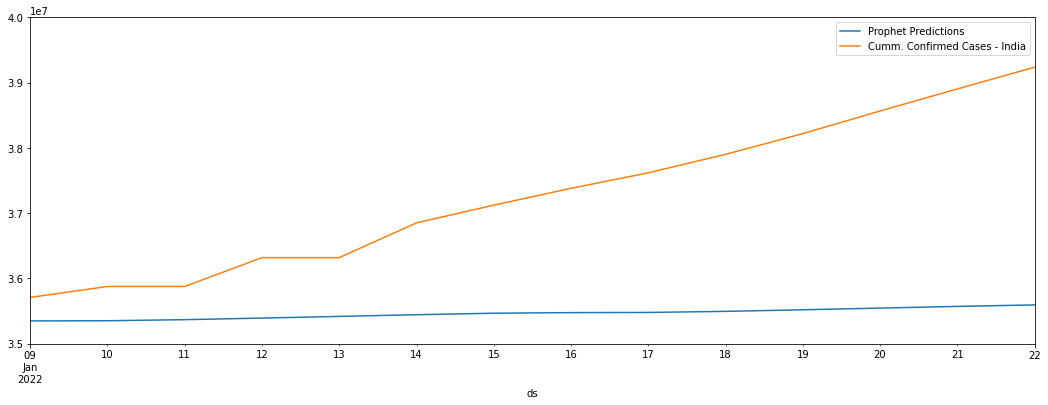

In [67]:
ax = forecast.plot(x='ds',y='yhat',label='Prophet Predictions',legend=True,figsize=(18,6));

test.plot(x='ds',y='y',label='Cumm. Confirmed Cases - India',legend=True,ax=ax,xlim=('2022-01-09','2022-01-22'),ylim=(3.5e7,4e7));

In [68]:
predictions_prophet = forecast.iloc[-17:]['yhat']

In [69]:
predictions_prophet

717    3.534766e+07
718    3.535033e+07
719    3.536699e+07
720    3.539102e+07
721    3.541720e+07
722    3.544273e+07
723    3.546575e+07
724    3.547497e+07
725    3.547758e+07
726    3.549424e+07
727    3.551829e+07
728    3.554450e+07
729    3.557006e+07
730    3.559309e+07
731    3.560228e+07
732    3.560483e+07
733    3.562148e+07
Name: yhat, dtype: float64

In [70]:
error_mae = mean_absolute_error(test['y'], predictions_prophet)
error_mse = mean_squared_error(test['y'], predictions_prophet)
error_rmse = rmse(test['y'], predictions_prophet)

In [71]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 2237559.153388818
Mean Squared Error (MSE) : 6760737725727.081
Root Mean Squared Error (RMSE) : 2600141.8664617287


## Deep Learning Methods

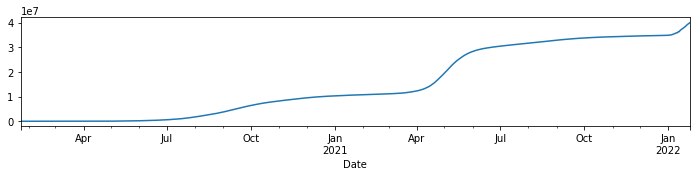

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(confirmed['Cumm. Confirmed Cases - India'])
results.observed.plot(figsize=(12,2));

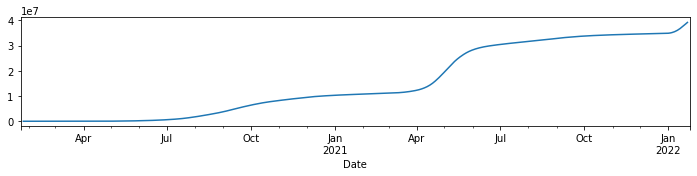

In [78]:
results.trend.plot(figsize=(12,2));

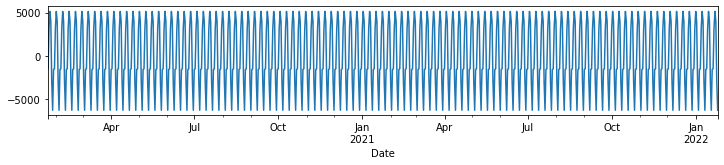

In [79]:
results.seasonal.plot(figsize=(12,2));

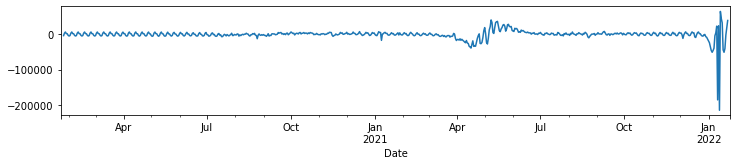

In [81]:
results.resid.plot(figsize=(12,2));

In [88]:
train = train_data.drop('Time',axis=1)
train.head()

,Cumm. Confirmed Cases - India
Date,
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0


In [89]:
test = test_data.drop('Time',axis=1)
test.head()

,Cumm. Confirmed Cases - India
Date,
2022-01-09,35707727
2022-01-10,35875790
2022-01-11,35875790
2022-01-12,36317927
2022-01-13,36317927


### Scale Data

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [91]:
# WE ONLY FIT TO TRAINING DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [92]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Time Series Generator

In [95]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [96]:
scaled_train

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.80051430e-08],
       [2.80051430e-08],
       [2.80051430e-08],
       [5.60102860e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [8.40154289e-08],
       [1.40025715e-07],


In [146]:
# Let's redefine to get 14 days back and then predict the next month out
n_input = 14
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [147]:
# What does the first batch look like?
X,y = generator[0]

In [148]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.80051430e-08
 2.80051430e-08 2.80051430e-08 5.60102860e-08 8.40154289e-08
 8.40154289e-08 8.40154289e-08]
Predict this y: 
 [[8.40154289e-08]]


## Simple RNN (Recurrent Neural Network)

In [207]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN

In [211]:
# define model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

In [212]:
model_rnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [213]:
# fit model
model_rnn.fit_generator(generator,epochs=500)

Epoch 1/500
704/704 [==============================] - 5s 5ms/step - loss: 0.0026
Epoch 2/500
704/704 [==============================] - 4s 5ms/step - loss: 3.8919e-04
Epoch 3/500
704/704 [==============================] - 4s 5ms/step - loss: 1.5595e-05
Epoch 4/500
704/704 [==============================] - 4s 6ms/step - loss: 3.2787e-05
Epoch 5/500
704/704 [==============================] - 4s 6ms/step - loss: 5.4849e-05
Epoch 6/500
704/704 [==============================] - 4s 5ms/step - loss: 7.5966e-05
Epoch 7/500
704/704 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 8/500
704/704 [==============================] - 5s 6ms/step - loss: 1.0235e-05
Epoch 9/500
704/704 [==============================] - 4s 6ms/step - loss: 6.0199e-06
Epoch 10/500
704/704 [==============================] - 4s 5ms/step - loss: 7.5187e-05
Epoch 11/500
704/704 [==============================] - 4s 6ms/step - loss: 7.7362e-06
Epoch 12/500
704/704 [==============================] - 4s 6

704/704 [==============================] - 3s 5ms/step - loss: 2.9161e-06
Epoch 189/500
704/704 [==============================] - 4s 5ms/step - loss: 3.8956e-06
Epoch 190/500
704/704 [==============================] - 3s 5ms/step - loss: 7.4560e-06
Epoch 191/500
704/704 [==============================] - 3s 5ms/step - loss: 1.1491e-06
Epoch 192/500
704/704 [==============================] - 3s 5ms/step - loss: 3.3865e-06
Epoch 193/500
704/704 [==============================] - 3s 5ms/step - loss: 4.9861e-06
Epoch 194/500
704/704 [==============================] - 4s 5ms/step - loss: 5.0151e-06
Epoch 195/500
704/704 [==============================] - 3s 5ms/step - loss: 1.2568e-06
Epoch 196/500
704/704 [==============================] - 3s 5ms/step - loss: 1.6324e-06
Epoch 197/500
704/704 [==============================] - 3s 5ms/step - loss: 5.0729e-06
Epoch 198/500
704/704 [==============================] - 4s 5ms/step - loss: 1.4283e-06
Epoch 199/500
704/704 [=======================

704/704 [==============================] - 4s 5ms/step - loss: 2.6314e-06
Epoch 375/500
704/704 [==============================] - 3s 5ms/step - loss: 8.7472e-07
Epoch 376/500
704/704 [==============================] - 3s 5ms/step - loss: 1.1271e-05
Epoch 377/500
704/704 [==============================] - 3s 5ms/step - loss: 7.5866e-07
Epoch 378/500
704/704 [==============================] - 3s 5ms/step - loss: 5.6778e-07
Epoch 379/500
704/704 [==============================] - 4s 5ms/step - loss: 1.6958e-06
Epoch 380/500
704/704 [==============================] - 3s 5ms/step - loss: 7.6154e-06
Epoch 381/500
704/704 [==============================] - 3s 5ms/step - loss: 6.9677e-07
Epoch 382/500
704/704 [==============================] - 3s 5ms/step - loss: 1.6124e-06
Epoch 383/500
704/704 [==============================] - 4s 5ms/step - loss: 1.6141e-06
Epoch 384/500
704/704 [==============================] - 3s 5ms/step - loss: 4.2098e-06
Epoch 385/500
704/704 [=======================

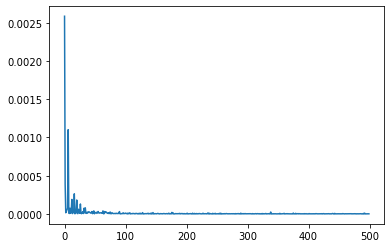

In [214]:
loss_per_epoch = model_rnn.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test Dataset

In [215]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_rnn.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [216]:
test_predictions

[array([1.0037782], dtype=float32),
 array([1.0072488], dtype=float32),
 array([1.0098455], dtype=float32),
 array([1.0115824], dtype=float32),
 array([1.0125359], dtype=float32),
 array([1.0127538], dtype=float32),
 array([1.0122908], dtype=float32),
 array([1.0111934], dtype=float32),
 array([1.0095061], dtype=float32),
 array([1.0072706], dtype=float32),
 array([1.0045267], dtype=float32),
 array([1.0013124], dtype=float32),
 array([0.9976629], dtype=float32),
 array([0.9936164], dtype=float32),
 array([0.9892065], dtype=float32),
 array([0.9844659], dtype=float32),
 array([0.9794255], dtype=float32)]

In [217]:
scaled_test

array([[1.        ],
       [1.00470663],
       [1.00470663],
       [1.01708874],
       [1.01708874],
       [1.03201646],
       [1.03961151],
       [1.04683933],
       [1.05350506],
       [1.06142967],
       [1.0703222 ],
       [1.0800471 ],
       [1.08950455],
       [1.09884519],
       [1.10741655],
       [1.11458234],
       [1.1225894 ]])

In [218]:
predictions_rnn = scaler.inverse_transform(test_predictions)

In [219]:
predictions_rnn

array([[35842638.62056184],
       [35966563.71709168],
       [36059287.25563836],
       [36121307.26925564],
       [36155356.55470002],
       [36163137.78907835],
       [36146604.79437077],
       [36107417.68075645],
       [36047168.4513303 ],
       [35967342.69186807],
       [35869366.39444673],
       [35754588.93067348],
       [35624274.53830016],
       [35479783.23066586],
       [35322315.39513093],
       [35153039.49385995],
       [34973058.0102796 ]])

In [220]:
predictions_rnn = pd.DataFrame(predictions_rnn, index = test.index, columns=['RNN Predictions'])

In [221]:
predictions_rnn

,RNN Predictions
Date,
2022-01-09,3.584264e+07
2022-01-10,3.596656e+07
2022-01-11,3.605929e+07
2022-01-12,3.612131e+07
2022-01-13,3.615536e+07
2022-01-14,3.616314e+07
2022-01-15,3.614660e+07
2022-01-16,3.610742e+07
2022-01-17,3.604717e+07


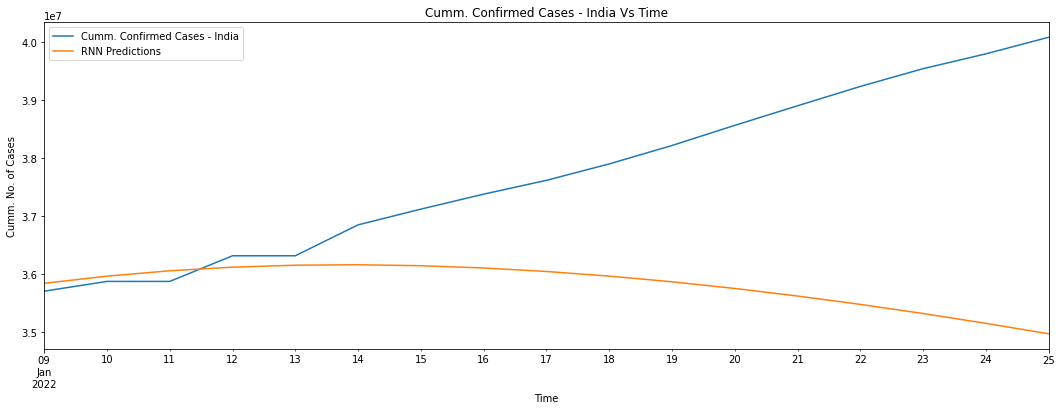

In [222]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
ax = predictions_rnn['RNN Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [223]:
error_mae = mean_absolute_error(test_data['Cumm. Confirmed Cases - India'], predictions_rnn['RNN Predictions'])
error_mse = mean_squared_error(test_data['Cumm. Confirmed Cases - India'], predictions_rnn['RNN Predictions'])
error_rmse = rmse(test_data['Cumm. Confirmed Cases - India'], predictions_rnn['RNN Predictions'])

In [224]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 1963918.0805044454
Mean Squared Error (MSE) : 6659573907860.981
Root Mean Squared Error (RMSE) : 2580615.025117265


## LSTM (Long Short-Term Memory)

### Create Model

In [149]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [150]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [151]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [153]:
# fit model
model.fit_generator(generator,epochs=500)

Epoch 1/500
704/704 [==============================] - 6s 8ms/step - loss: 2.0313e-04
Epoch 2/500
704/704 [==============================] - 7s 9ms/step - loss: 1.3975e-04
Epoch 3/500
704/704 [==============================] - 7s 9ms/step - loss: 8.6794e-05
Epoch 4/500
704/704 [==============================] - 6s 8ms/step - loss: 1.2569e-04
Epoch 5/500
704/704 [==============================] - 5s 8ms/step - loss: 1.0712e-04
Epoch 6/500
704/704 [==============================] - 5s 8ms/step - loss: 1.7719e-04
Epoch 7/500
704/704 [==============================] - 6s 8ms/step - loss: 5.5310e-05
Epoch 8/500
704/704 [==============================] - 5s 8ms/step - loss: 9.1431e-05
Epoch 9/500
704/704 [==============================] - 6s 8ms/step - loss: 3.4573e-05
Epoch 10/500
704/704 [==============================] - 7s 9ms/step - loss: 1.0828e-04
Epoch 11/500
704/704 [==============================] - 8s 11ms/step - loss: 9.0335e-05
Epoch 12/500
704/704 [=============================

704/704 [==============================] - 5s 7ms/step - loss: 2.5127e-06
Epoch 96/500
704/704 [==============================] - 5s 7ms/step - loss: 7.0624e-06
Epoch 97/500
704/704 [==============================] - 5s 7ms/step - loss: 5.1973e-06
Epoch 98/500
704/704 [==============================] - 5s 7ms/step - loss: 9.9021e-06
Epoch 99/500
704/704 [==============================] - 5s 7ms/step - loss: 2.2487e-06
Epoch 100/500
704/704 [==============================] - 5s 7ms/step - loss: 5.2551e-06
Epoch 101/500
704/704 [==============================] - 5s 7ms/step - loss: 2.4386e-05
Epoch 102/500
704/704 [==============================] - 5s 8ms/step - loss: 1.2144e-06
Epoch 103/500
704/704 [==============================] - 5s 7ms/step - loss: 3.5617e-06
Epoch 104/500
704/704 [==============================] - 5s 7ms/step - loss: 4.2619e-06
Epoch 105/500
704/704 [==============================] - 5s 7ms/step - loss: 9.3776e-06
Epoch 106/500
704/704 [===========================

704/704 [==============================] - 5s 7ms/step - loss: 8.0848e-07
Epoch 282/500
704/704 [==============================] - 5s 7ms/step - loss: 2.7622e-06
Epoch 283/500
704/704 [==============================] - 5s 7ms/step - loss: 8.6859e-07
Epoch 284/500
704/704 [==============================] - 5s 7ms/step - loss: 2.9732e-06
Epoch 285/500
704/704 [==============================] - 5s 7ms/step - loss: 1.3798e-06
Epoch 286/500
704/704 [==============================] - 5s 7ms/step - loss: 2.5661e-06
Epoch 287/500
704/704 [==============================] - 5s 7ms/step - loss: 2.8062e-06
Epoch 288/500
704/704 [==============================] - 5s 7ms/step - loss: 1.9147e-06
Epoch 289/500
704/704 [==============================] - 6s 9ms/step - loss: 2.0741e-06
Epoch 290/500
704/704 [==============================] - 7s 10ms/step - loss: 1.6008e-06
Epoch 291/500
704/704 [==============================] - 6s 8ms/step - loss: 1.3364e-06
Epoch 292/500
704/704 [======================

704/704 [==============================] - 5s 7ms/step - loss: 2.2830e-06
Epoch 468/500
704/704 [==============================] - 5s 7ms/step - loss: 1.1385e-06
Epoch 469/500
704/704 [==============================] - 5s 7ms/step - loss: 5.6438e-07
Epoch 470/500
704/704 [==============================] - 5s 7ms/step - loss: 2.7364e-06
Epoch 471/500
704/704 [==============================] - 5s 7ms/step - loss: 4.1662e-07
Epoch 472/500
704/704 [==============================] - 5s 7ms/step - loss: 1.2264e-06
Epoch 473/500
704/704 [==============================] - 5s 7ms/step - loss: 8.3934e-07
Epoch 474/500
704/704 [==============================] - 5s 7ms/step - loss: 8.4326e-07
Epoch 475/500
704/704 [==============================] - 5s 7ms/step - loss: 1.7155e-06
Epoch 476/500
704/704 [==============================] - 5s 7ms/step - loss: 2.6203e-06
Epoch 477/500
704/704 [==============================] - 5s 7ms/step - loss: 4.5424e-07
Epoch 478/500
704/704 [=======================

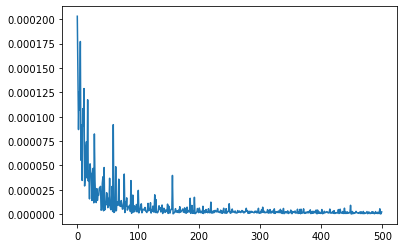

In [154]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test Data Set

In [155]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [156]:
test_predictions

[array([1.0053538], dtype=float32),
 array([1.011212], dtype=float32),
 array([1.0175656], dtype=float32),
 array([1.0244133], dtype=float32),
 array([1.0317528], dtype=float32),
 array([1.0395906], dtype=float32),
 array([1.0477629], dtype=float32),
 array([1.0559965], dtype=float32),
 array([1.0640831], dtype=float32),
 array([1.0718887], dtype=float32),
 array([1.0793743], dtype=float32),
 array([1.0865042], dtype=float32),
 array([1.0931016], dtype=float32),
 array([1.0991585], dtype=float32),
 array([1.104717], dtype=float32),
 array([1.1098272], dtype=float32),
 array([1.1145318], dtype=float32)]

In [157]:
scaled_test

array([[1.        ],
       [1.00470663],
       [1.00470663],
       [1.01708874],
       [1.01708874],
       [1.03201646],
       [1.03961151],
       [1.04683933],
       [1.05350506],
       [1.06142967],
       [1.0703222 ],
       [1.0800471 ],
       [1.08950455],
       [1.09884519],
       [1.10741655],
       [1.11458234],
       [1.1225894 ]])

In [158]:
predictions_lstm = scaler.inverse_transform(test_predictions)

In [159]:
predictions_lstm

array([[35898899.32886517],
       [36108081.72482812],
       [36334954.93593132],
       [36579472.13855433],
       [36841548.19884181],
       [37121417.23489594],
       [37413230.55085468],
       [37707236.0635885 ],
       [37995988.81744766],
       [38274708.54645467],
       [38542003.31207466],
       [38796596.1064775 ],
       [39032174.25428951],
       [39248452.55709529],
       [39446933.62744164],
       [39629405.27629077],
       [39797395.65634608]])

In [160]:
predictions_lstm = pd.DataFrame(predictions_lstm, index = test.index, columns=['LSTM Predictions'])

In [161]:
predictions_lstm

,LSTM Predictions
Date,
2022-01-09,3.589890e+07
2022-01-10,3.610808e+07
2022-01-11,3.633495e+07
2022-01-12,3.657947e+07
2022-01-13,3.684155e+07
2022-01-14,3.712142e+07
2022-01-15,3.741323e+07
2022-01-16,3.770724e+07
2022-01-17,3.799599e+07


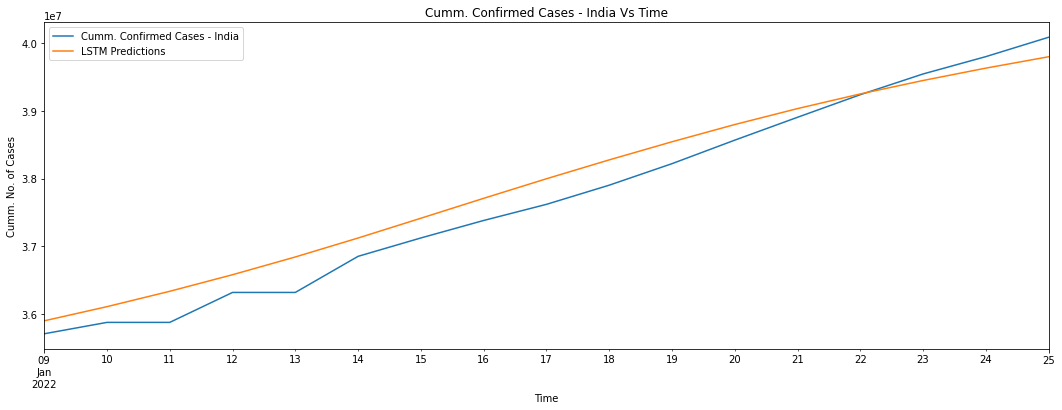

In [162]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
ax = predictions_lstm['LSTM Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [163]:
error_mae = mean_absolute_error(test_data['Cumm. Confirmed Cases - India'], predictions_lstm['LSTM Predictions'])
error_mse = mean_squared_error(test_data['Cumm. Confirmed Cases - India'], predictions_lstm['LSTM Predictions'])
error_rmse = rmse(test_data['Cumm. Confirmed Cases - India'], predictions_lstm['LSTM Predictions'])

In [164]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 267931.07118356926
Mean Squared Error (MSE) : 87413224403.11166
Root Mean Squared Error (RMSE) : 295657.2752413031


## GRU

In [165]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU

In [186]:
# define model
model_gru = Sequential()
model_gru.add(GRU(100, activation='relu', input_shape=(n_input, n_features)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

In [187]:
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 100)               30900     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [188]:
# fit model
history_gru = model_gru.fit_generator(generator,epochs=500)

Epoch 1/500
704/704 [==============================] - 8s 8ms/step - loss: 0.0075
Epoch 2/500
704/704 [==============================] - 6s 9ms/step - loss: 6.1668e-05
Epoch 3/500
704/704 [==============================] - 6s 9ms/step - loss: 3.3067e-04
Epoch 4/500
704/704 [==============================] - 7s 9ms/step - loss: 4.6655e-04
Epoch 5/500
704/704 [==============================] - 6s 8ms/step - loss: 8.0947e-05
Epoch 6/500
704/704 [==============================] - 7s 9ms/step - loss: 6.0017e-05
Epoch 7/500
704/704 [==============================] - 7s 10ms/step - loss: 6.7904e-05
Epoch 8/500
704/704 [==============================] - 6s 9ms/step - loss: 7.2469e-05
Epoch 9/500
704/704 [==============================] - 6s 9ms/step - loss: 1.1862e-04
Epoch 10/500
704/704 [==============================] - 6s 9ms/step - loss: 7.8902e-05
Epoch 11/500
704/704 [==============================] - 6s 9ms/step - loss: 5.5054e-05
Epoch 12/500
704/704 [==============================] -

704/704 [==============================] - 6s 8ms/step - loss: 8.6474e-06
Epoch 189/500
704/704 [==============================] - 6s 8ms/step - loss: 3.1588e-06
Epoch 190/500
704/704 [==============================] - 6s 8ms/step - loss: 9.5926e-06
Epoch 191/500
704/704 [==============================] - 6s 8ms/step - loss: 7.3555e-06
Epoch 192/500
704/704 [==============================] - 6s 8ms/step - loss: 2.7818e-06
Epoch 193/500
704/704 [==============================] - 6s 8ms/step - loss: 1.5662e-05
Epoch 194/500
704/704 [==============================] - 6s 9ms/step - loss: 3.3451e-06
Epoch 195/500
704/704 [==============================] - 6s 8ms/step - loss: 5.1655e-06
Epoch 196/500
704/704 [==============================] - 6s 8ms/step - loss: 8.1858e-06
Epoch 197/500
704/704 [==============================] - 6s 9ms/step - loss: 4.5870e-06
Epoch 198/500
704/704 [==============================] - 6s 8ms/step - loss: 5.7375e-06
Epoch 199/500
704/704 [=======================

704/704 [==============================] - 6s 8ms/step - loss: 1.9049e-06
Epoch 375/500
704/704 [==============================] - 6s 8ms/step - loss: 2.6076e-06
Epoch 376/500
704/704 [==============================] - 6s 8ms/step - loss: 1.0337e-05
Epoch 377/500
704/704 [==============================] - 6s 8ms/step - loss: 3.9582e-06
Epoch 378/500
704/704 [==============================] - 6s 8ms/step - loss: 4.2638e-06
Epoch 379/500
704/704 [==============================] - 6s 8ms/step - loss: 3.7991e-06
Epoch 380/500
704/704 [==============================] - 6s 8ms/step - loss: 4.0612e-06
Epoch 381/500
704/704 [==============================] - 6s 8ms/step - loss: 1.4869e-05
Epoch 382/500
704/704 [==============================] - 6s 8ms/step - loss: 3.8084e-06
Epoch 383/500
704/704 [==============================] - 6s 8ms/step - loss: 6.5446e-06
Epoch 384/500
704/704 [==============================] - 6s 8ms/step - loss: 2.4308e-06
Epoch 385/500
704/704 [=======================

704/704 [==============================] - 6s 8ms/step - loss: 4.8825e-06
Epoch 468/500
704/704 [==============================] - 6s 8ms/step - loss: 9.9144e-06
Epoch 469/500
704/704 [==============================] - 6s 9ms/step - loss: 2.8776e-06
Epoch 470/500
704/704 [==============================] - 8s 11ms/step - loss: 4.7769e-06
Epoch 471/500
704/704 [==============================] - 6s 9ms/step - loss: 5.0831e-06
Epoch 472/500
704/704 [==============================] - 6s 9ms/step - loss: 2.0317e-06
Epoch 473/500
704/704 [==============================] - 6s 8ms/step - loss: 3.6353e-06
Epoch 474/500
704/704 [==============================] - 6s 8ms/step - loss: 2.5927e-06
Epoch 475/500
704/704 [==============================] - 6s 9ms/step - loss: 3.7474e-06
Epoch 476/500
704/704 [==============================] - 6s 8ms/step - loss: 6.0752e-06
Epoch 477/500
704/704 [==============================] - 7s 9ms/step - loss: 1.4349e-06
Epoch 478/500
704/704 [======================

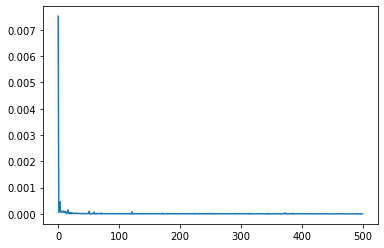

In [190]:
loss_per_epoch = model_gru.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test Dataset

In [191]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_gru.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [192]:
test_predictions

[array([1.0013368], dtype=float32),
 array([1.0026672], dtype=float32),
 array([1.0039898], dtype=float32),
 array([1.0053048], dtype=float32),
 array([1.0066134], dtype=float32),
 array([1.00792], dtype=float32),
 array([1.0092248], dtype=float32),
 array([1.0105275], dtype=float32),
 array([1.0118287], dtype=float32),
 array([1.0131284], dtype=float32),
 array([1.014427], dtype=float32),
 array([1.0157241], dtype=float32),
 array([1.01702], dtype=float32),
 array([1.0183146], dtype=float32),
 array([1.0196083], dtype=float32),
 array([1.0209008], dtype=float32),
 array([1.0221927], dtype=float32)]

In [193]:
scaled_test

array([[1.        ],
       [1.00470663],
       [1.00470663],
       [1.01708874],
       [1.01708874],
       [1.03201646],
       [1.03961151],
       [1.04683933],
       [1.05350506],
       [1.06142967],
       [1.0703222 ],
       [1.0800471 ],
       [1.08950455],
       [1.09884519],
       [1.10741655],
       [1.11458234],
       [1.1225894 ]])

In [194]:
predictions_gru = scaler.inverse_transform(test_predictions)

In [195]:
predictions_gru

array([[35755461.55269074],
       [35802966.24397206],
       [35850194.25022352],
       [35897149.82813787],
       [35943875.54464281],
       [35990533.15406346],
       [36037122.65639985],
       [36083639.79495919],
       [36130101.59651256],
       [36176512.31775272],
       [36222880.47206521],
       [36269197.5460645 ],
       [36315472.05313611],
       [36361699.73658729],
       [36407893.36649632],
       [36454048.68617046],
       [36500178.46568799]])

In [196]:
predictions_gru = pd.DataFrame(predictions_gru, index = test.index, columns=['GRU Predictions'])

In [197]:
predictions_gru

,GRU Predictions
Date,
2022-01-09,3.575546e+07
2022-01-10,3.580297e+07
2022-01-11,3.585019e+07
2022-01-12,3.589715e+07
2022-01-13,3.594388e+07
2022-01-14,3.599053e+07
2022-01-15,3.603712e+07
2022-01-16,3.608364e+07
2022-01-17,3.613010e+07


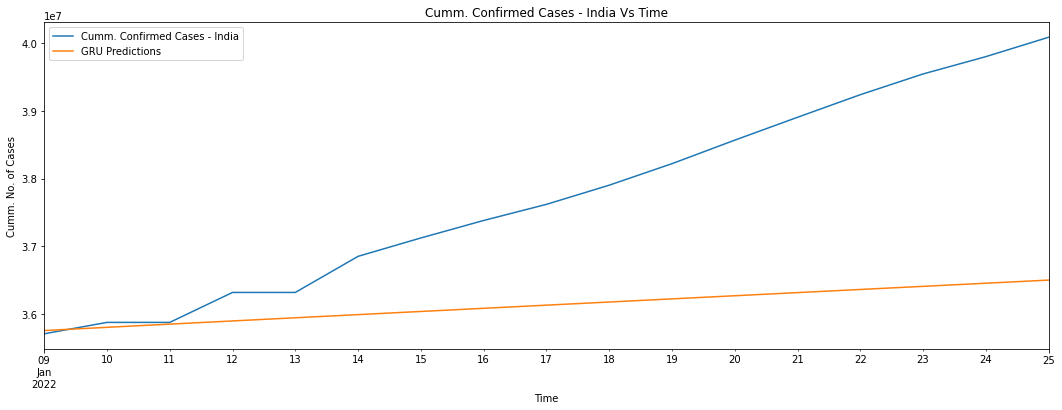

In [198]:
# Plot predictions against known values
title = 'Cumm. Confirmed Cases - India Vs Time'
ylabel='Cumm. No. of Cases'
xlabel='Time'

ax = test['Cumm. Confirmed Cases - India'].plot(legend=True,figsize=(18,6),title=title)
ax = predictions_gru['GRU Predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [199]:
error_mae = mean_absolute_error(test_data['Cumm. Confirmed Cases - India'], predictions_gru['GRU Predictions'])
error_mse = mean_squared_error(test_data['Cumm. Confirmed Cases - India'], predictions_gru['GRU Predictions'])
error_rmse = rmse(test_data['Cumm. Confirmed Cases - India'], predictions_gru['GRU Predictions'])

In [200]:
print('Mean Absolute Error (MAE) :', error_mae)
print('Mean Squared Error (MSE) :', error_mse)
print('Root Mean Squared Error (RMSE) :', error_rmse)

Mean Absolute Error (MAE) : 1601060.8729305197
Mean Squared Error (MSE) : 3953714433002.4414
Root Mean Squared Error (RMSE) : 1988394.9388897673


### Thank You!!!